<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_142_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 142: Satellite Imagery Analysis II - Sundarbans

---

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Sundarbans Satellite Imagery I|
|||
|**Class Description**|In this class, a student will understand and explore Sundarbans satellite data using Python|
|||
|**Class**|C142|
|||
|**Class Time**|50 minutes|
|||
|**Goal**|Explore the Sundarbans satellite images|
||Obtain Vegetation Indices|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

#### Teacher-Student Activities

In the previous classes, we explored Choropleth Maps and performed EDA on satellite data using EarthPy python package. We also computed a vegetation index called NDVI (Normalized Difference Vegetation Index) to estimate the density of greenness on an area of land.

In today's class, we will explore different types of vegetation indices to analyse satellite data for Sundarbans dataset.

Before that, let us first explore the satellite dataset of Sundarbans region in more detail.



---

#### Sundarbans

Sundarbans is the world's largest mangrove forest covering an area of about 10,000 sq km. It is situated in the river [delta](https://en.wikipedia.org/wiki/Ganges_Delta) formed at the confluence on rivers Ganga, Brahmaputra, and Meghna rivers in Bay of Bengal. Sundarbans are enlisted in [UNESCO World Heritage Sites](https://en.wikipedia.org/wiki/World_Heritage_Site).

- Sundarbans has a significant number of rare or endangered species living in the park, including tigers, aquatic mammals, birds and reptiles.

- Sundarbans is one of the most biologically productive of all natural ecosystems.

- The mangrove habitat supports the single largest population of tigers ([Bengal Tiger](https://en.wikipedia.org/wiki/Bengal_tiger)) in the world which have adapted to an almost amphibious life, being capable of swimming for long distances and feeding on fish, crab and water monitor lizards.



<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/9d890942-d442-47b2-923e-783d930b6d14.jpeg width = 750>

`Landsat 7 image of Sundarbans, released by NASA Earth Observatory | Image source:` [`Wikipedia`](https://en.wikipedia.org/wiki/Sundarbans#/media/File:Sundarbans.jpg)</center>

**Objective:**

Explore the satellite images of a  selected zone within sundarban range and obtain vegetation indices to understand the forest coverage. For this, we will use a small part of the Sundarbans satellite data which was acquired using the **Sentinel-2 Satellite** on 27 January 2020.




---

#### Sentinel-2

- [Sentinel-2](https://en.wikipedia.org/wiki/Sentinel-2) is a mission in the European Union's [Copernicus](https://en.wikipedia.org/wiki/Copernicus_Programme) Earth observation programme.
- It comprises a pair of 2 polar-orbiting satellites placed in the same sun-synchronous orbit, at a phase of 180 degrees to each other.
- The 2 satellites: [Sentinel-2A](https://en.wikipedia.org/wiki/Sentinel-2A), and [Sentinel-2B](https://en.wikipedia.org/wiki/Sentinel-2B) systematically acquire optical images of the land and coastal waters at a high spatial resolution and provide high quality scientific data for science and research community.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/5e40c4b4-50dc-48b1-b402-d46a8ce9150e.jpeg width=500>

`Model of a Sentinel-2 satellite, Image source:` [`Wikipedia`](https://en.wikipedia.org/wiki/Sentinel-2#/media/File:Sentinel_2-IMG_5873-white_(crop).jpg)
</center>


- The data acquired by the satellites is used for a broad range of applications such as:

  1. Agricultural Monitoring
  2. Forest Cover
  3. Land Cover Classification
  4. Water Quality Management

- The Sentinel-2 satellite data has 954 $\times$ 298 pixels and  consists of **13 bands** in the visible, near infrared, and short wave infrared spectrum. However, we will be using 12 bands for obtaining various vegetation indices.

- The list of band with their central wavelengths and resolutions are shown below:

  <center>
  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/3bfa3dc5-2697-48a9-b050-877175edb84b.PNG"/>
  
  `Table 1: Sentinel-2 spectral bands`
  </center>


  **Note:** You can download Sentinel-2 data from [Copernicus Open Access Hub](https://scihub.copernicus.eu/dhus/#/home) which provides complete, free and open access to Sentinel-1, Sentinel-2, Sentinel-3 and Sentinel-5P data. However, the procedure of extracting and obtaining satellite data from this hub is beyond the scope of this course.  

---

#### Activity 1: Downloading Dataset

Let us first install `earthpy` package using `! pip install` command. This will also install `rasterio` package needed for reading and writing raster data.

In [ ]:
# S1.1: Install 'earthpy' package.

! pip install earthpy

     |████████████████████████████████| 1.4 MB 4.1 MB/s 
     |████████████████████████████████| 1.0 MB 59.4 MB/s 
     |████████████████████████████████| 19.3 MB 1.1 MB/s 
     |████████████████████████████████| 6.3 MB 69.5 MB/s 
     |████████████████████████████████| 16.7 MB 40.2 MB/s 


We will use a small part of the Sundarbans satellite data which was acquired using the Sentinel-2 Satellite on 27 January 2020.

To download the dataset, run the below code cell. This code will create a copy of the files located in the Github folder in the local runtime environment.

**Dataset link:** https://github.com/whitehatjr-test/sundarbans_data


In [ ]:
# Run the code to download the sundarbans tiff files in local runtime environment.

! git clone https://github.com/whitehatjr-test/sundarbans_data.git

Cloning into 'sundarbans_data'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


You can use file explorer to explore the files inside `'sundarbans_data'` folder. Notice that there are some `.tiff` files that contain the word `B` alongwith a number like `B01`, `B02`, `B03` and so on.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/950993fb-aebc-4a0a-9646-d872ada8c2b1.PNG"/>


These are nothing but the 12 spectral bands of Sentinel-2 data that we need for our analysis.

Let us first generate a list of only those `.tiff` files containing the 12 spectral bands data. For this, perform the following steps:

1. Import `glob` module as `gb`.
2. Use `glob()` function of `gb` and pass the pattern of the file name.
  
  The pattern would be: `/content/sundarbans_data/*B*.tiff`
  
  Here,
  - `/content/sundarbans_data/` is the path to the directory where all `.tiff` files are located.
  - `*B*.tiff` is the pattern which indicates that the file name must contain the alphabet `"B"` and end with `".tiff"`.

3. Display the extracted paths.


In [ ]:
# S1.2: Grab files containing "B" and that end with .tiff
import glob as gb
sundarbans_path = gb.glob("/content/sundarbans_data/*B*.tiff")
sundarbans_path

['/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-

Thus, we stored all the 12 `.tiff` files each containing spectral  data of a band inside a single list. However, the bands do not appear in sorted order.

Let us apply the `sort()` function of list to sort the spectral band list alphabetically.

In [ ]:
# S1.3: Sort the spectral bands (if not in sorted order).
sundarbans_path.sort()
sundarbans_path

['/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-

Now that we have obtained all the 12 spectral bands inside a list, let us plot different band combinations.

---

#### Activity 2: Plotting RGB Composite Image

For creating a color RGB image, we need all of the 12 bands together in the same file or "stack". In the previous class, we used `stack()` function of `earthpy.spatial` module to stack all raster files together.

Here, we will use `stack()` function of `numpy` module to stack all the 12 spectral bands together in a numpy array. But before that, we need to open and read each `.tiff` file using the `rasterio` package.
Let us understand how to do so.

**Reading Raster Data using `rasterio` package:**

Consider a GeoTIFF file having the following path in our local environment:

`/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff`

**Note:** You can obtain the path to any file by using "Copy path" option obtained by right click.

To open this `.tiff` file,
- Import `rasterio` as `rio`.
- Use `open()` function of `rio` and pass the path to the `.tiff` file as input to the `open()` function. This function returns an opened dataset object. Store this object in a variable and print its value.


In [ ]:
# S2.1: Open a '.tiff' file using rasterio
import rasterio as rio
band1_path = '/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff'
band1 = rio.open(band1_path)
band1

<open DatasetReader name='/content/sundarbans_data/2020-01-27-00_00_2020-01-27-23_59_Sentinel-2_L2A_B01_(Raw).tiff' mode='r'>

From the output, you may observe that the dataset is open in **read** mode. This implies that you cannot modify this `.tiff` file.

If you try to access a nonexistent path, the `open()` function raises an exception or error message immediately.

In [ ]:
# S2.2: Try to open a '.tiff' file that does not exist using 'rio.open()' function.
rio.open('/content/Hello.tiff')

RasterioIOError: ignored

Hence, we obtained a RasterioIOError message confirming the non-existence of the specified raster file.

A raster file (`.tiff` file) may have more than 1 bands. To read the first band of a file, use `read(1)` function of opened dataset object.

In [ ]:
# S2.3: Read first band of raster file and print its shape.
band1_array = band1.read(1)
band1_array.shape

(954, 298)

The returned object is a two-dimensional numpy array having 954 rows and 298 columns. Now that we have opened and read a raster band, we can plot the band using `imshow()` function of `matplotlib.pyplot` module.


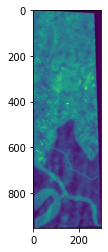

In [ ]:
# S2.4: Plot the raster data obtained from read(1) function.
import matplotlib.pyplot as plt
plt.imshow(band1_array)
plt.show()

Similarly, you can also plot other bands of raster data by using `open()` and `read()` function of `rasterio` module.

Let us now open and read all the 12 raster files containing the 12 spectral bands and store it within a list. To do so, follow the steps given below:
1. Create an empty list `all_bands`.
2. Initiate a `for` loop that iterates through all the 12 `.tiff` files stored in a list in *Activity 1*.
 - Using `with` statement, call `open()` function of `rasterio` and pass the `.tiff` file path as input.

  **Note:** The `with` statement ensures that each file is closed before a new file is opened. It gives better syntax and error handling.

 - Inside `with` statement, call `read(1)` function of `rasterio` to read only 1 band from every `.tiff` file (even if there exists more than 1).
 - Append the 2D numpy array obtained from `read(1)` function to the  `all_bands` list.

3. Print the  elements of `all_bands` list and also the number of elements of this list using `len()` function.

In [ ]:
# S2.5: Open and read all 12 bands using rasterio.
all_bands = []

for path in sundarbans_path:
  with rio.open(path) as file:
    all_bands.append(file.read(1))

print("Number of 2D arrays:",len(all_bands))
all_bands

Number of 2D arrays: 12


[array([[4954, 4863, 4797, ...,    0,    0,    0],
        [5020, 4941, 4882, ...,    0,    0,    0],
        [5046, 4974, 4922, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16),
 array([[5453, 4692, 4784, ...,    0,    0,    0],
        [5544, 5564, 5564, ...,    0,    0,    0],
        [5243, 5112, 5459, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16),
 array([[8297, 7523, 6960, ...,    0,    0,    0],
        [8480, 7340, 7523, ...,    0,    0,    0],
        [8257, 7956, 7156, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]], dtype=uint

Hence, we obtained total 12 of two-dimensional arrays each containing a spectral band data.

Let us now stack all the 2D arrays inside a  3D array using `stack()` function of the `numpy` module. This is similar to the `stack()` function of `earthpy.spatial` module studied in the previous class.

In [ ]:
# S2.6: Stack all the spectral bands in a list using 'np.stack()' function.
import numpy as np
arr_st = np.stack(all_bands)
arr_st

array([[[4954, 4863, 4797, ...,    0,    0,    0],
        [5020, 4941, 4882, ...,    0,    0,    0],
        [5046, 4974, 4922, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[5453, 4692, 4784, ...,    0,    0,    0],
        [5544, 5564, 5564, ...,    0,    0,    0],
        [5243, 5112, 5459, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       [[8297, 7523, 6960, ...,    0,    0,    0],
        [8480, 7340, 7523, ...,    0,    0,    0],
        [8257, 7956, 7156, ...,    0,    0,    0],
        ...,
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]],

       ...,

       [[3539, 3093, 431

Let us now plot the stacked raster bands to visualise all the 12 raster layers of Sentinel-2 data using the EarthPy `plot_bands()` function.

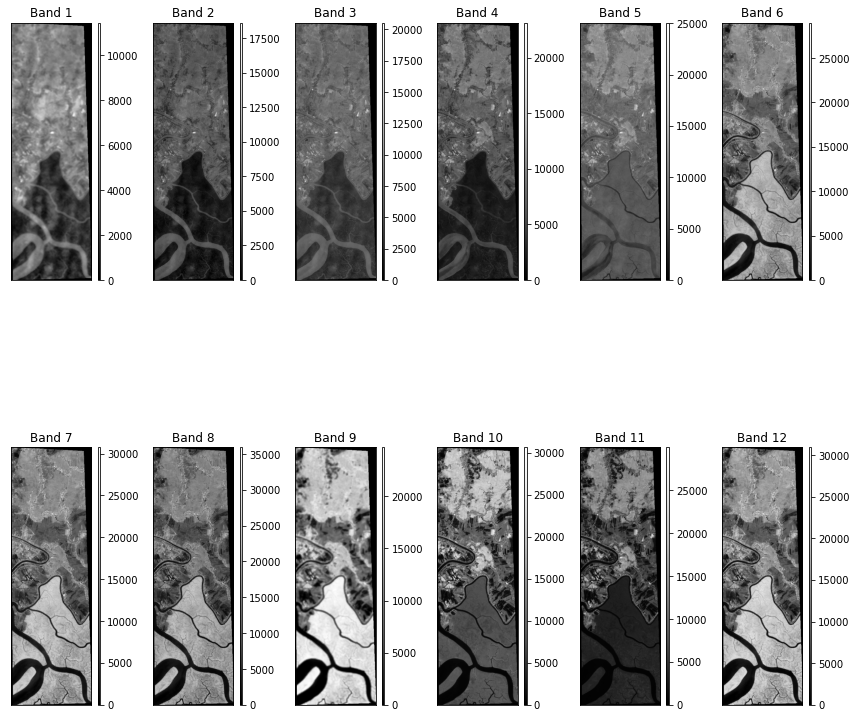

In [ ]:
# S2.7: Plot all the 12 spectral bands using 'plot_bands()' function.
# Use 'cols = 6' attribute to display maximum 6 bands in a single row
import earthpy.plot as epp
import matplotlib.pyplot as plt
epp.plot_bands(arr_st, cols = 6)
plt.show()

Let us combine these bands to create a true colour composite image or an RGB image. To plot 3 band colour composite images, we can use `plot_rgb()` function of `earthpy.plot` module.

Refer to the sentinel-2 bands given in the table below to recognise the red, green and blue bands.

<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/3bfa3dc5-2697-48a9-b050-877175edb84b.PNG"/>

To create a RGB composite image, perform the following steps:
1. Call `plot_rgb()` function of `earthpy.plot` module and pass the following inputs:
 - Stacked image array.
 - `rgb = (3, 2, 1)`: Bands 4, 3 and 2 are the RGB bands. Thus, the index would be 3, 2 and 1.
 - `title = 'RGB Composite Image'`

2. Call the `show()` function of `matplotlib.pyplot` module to display the 3 bands image.

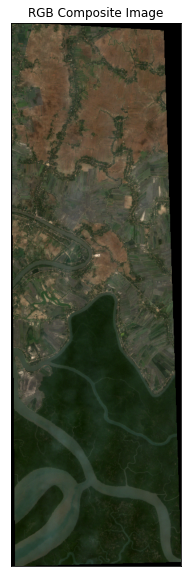

In [ ]:
# S2.8: Create a RGB composite image
epp.plot_rgb(arr_st, rgb = (3, 2, 1), title ='RGB Composite Image')
plt.show()

To increase the visual contrast, use  `stretch = True` attribute inside the `plot_rgb()` function. Also, specify `str_clip = 0.5` to brighten the image.

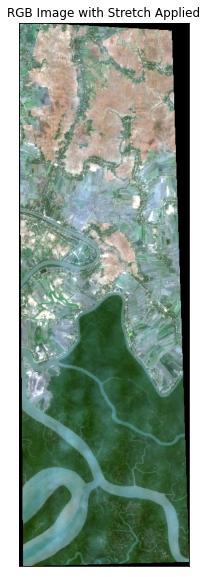

In [ ]:
# S2.9: Stretch the RGB composite image with str_clip = 0.5
epp.plot_rgb(arr_st, rgb = (3, 2, 1), stretch = True, str_clip = 0.5,
             title = "RGB Image with Stretch Applied")

plt.show()

Hence, we obtained a brighter RGB image after stretching the image. Let us now visualise each individual spectral band to understand the distribution of values of the bands.

---

#### Activity 3: Plotting Raster Histograms

Let us plot a histogram of each spectral bands to visualise the values of these bands  using the `hist()` function of `earthpy.plot` module.

To do, follow the steps given below:

1. Create a list that contains the colours to be given to each band like this:

  `colours_list = ['aqua', 'blue', 'green', 'red', 'orange', 'maroon', 'yellow', 'tomato', 'black', 'olive', 'brown', 'cyan']`

2. Call the `hist()` function of `epp` and pass the following inputs:
 - Stacked image array.
 - `title = [f'Band {i}' for i in range(1, 13) ]` to give titles like Band 1, Band 2, Band 3 and so on.
 - `colors = colours_list` to display each histogram with a unique colour.
 - `cols = 3` to display maximum 3 histograms in each column of the plot grid.
 - `figsize = (12, 10)` to adjust the size of histograms.

3. Call the `show()` function of `matplotlib.pyplot` module to display the raster bands with custom titles.


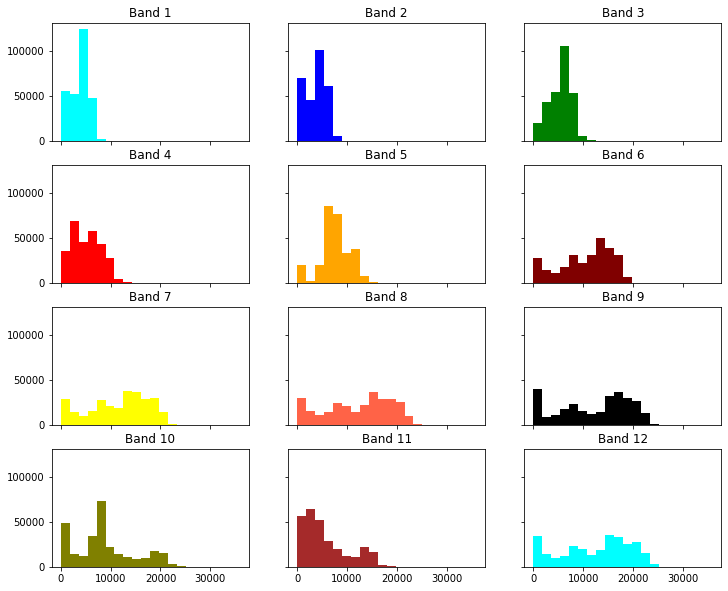

In [ ]:
# S3.1: Plot all band histograms using earthpy

colours_list = ['aqua', 'blue', 'green', 'red', 'orange', 'maroon',
          'yellow', 'tomato', 'black', 'olive', 'brown', 'cyan']

epp.hist(arr_st, colors = colours_list, title = [f'Band {i}' for i in range(1, 13)],
         cols = 3, figsize = (12, 10))

plt.show()

Let us now learn how to calculate and classify normalized difference vegetation indices in Python using EarthPy.


---

#### Activity 4: Calculating NDVI

In the previous class, we understood how to determine the density of greenness on a patch of land by measuring NDVI. Let us recall that.


**Normalized Difference Vegetation Index (NDVI):**

- The NDVI is a simple graphical indicator that is used to assess whether or not the target area being observed contains live green vegetation.
- NDVI always ranges from -1 to 1, where -1 represents minimal or no greenness or presence of water and 1 represents maximum greenness.
- NDVI is calculated from the **visible light** and **near-infrared light** reflected by vegetation as observed in the image given below:

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/4cbf87ee-906f-471d-ac1d-137ce0ac5968.png"/>


**How to calculate NDVI?**

- NDVI uses a ratio between near infrared and red light within the electromagnetic spectrum.
- To calculate NDVI, we use the following formula:

  $$\text{NDVI} = \frac{\text{(NIR - Red)}}{\text{(NIR + Red)}}$$

- Here,
  - $\text{NIR}$ is the reflection in the near-infrared spectrum.
  - $\text{Red}$ is the reflection in the red range of the spectrum.

Let us now calculate NDVI for our stacked raster data using `normalized_diff()` function of `earthpy.spatial` module.

For our Sentinel-2 raster data,
  - $\text{NIR}$ is at band 8.
  - $\text{Red}$ is at band 4.

/usr/local/lib/python3.7/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


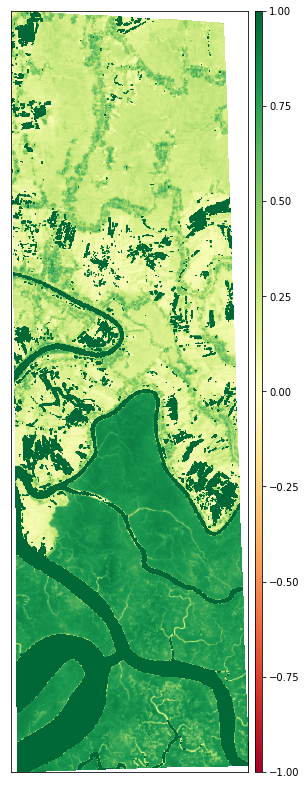

In [ ]:
# S4.1: Calculate NDVI
import earthpy.spatial as es
ndvi = es.normalized_diff(arr_st[7], arr_st[3])

epp.plot_bands(ndvi, cmap="RdYlGn", cols = 1, vmin = -1, vmax = 1, figsize = (10, 14))

plt.show()

Here you can observe:

1. The area shaded in light green color represents light vegetation.

2. The area shaded in dark green color represents dense vegetation.

3. The water bodies are marked using a distinctively a darker color out of the palettes $+1$ value.

<center><img src= https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/669cb17b-dd51-4925-8bc5-b78005f872c2.png></center>

You can also classify the NDVI results into different categories. Let us learn how to do so.





---

#### Activity 5: Plotting Classified NDVI

Let us categorise NDVI into useful classes based on the image bins values.
- The values under 0 will be classified as no vegetation.
- The values greater than 0.6 will be classified together as high vegetation.
- Additional classes will be created for the barren area and low, moderate areas.

Follow the steps given below to create classes and assign a class to each value of NDVI result:

1. Create a list containing the bin values that will be used to classify NDVI image like this:

  `ndvi_class_bins = [-np.inf, 0, 0.15, 0.23, 0.6, np.inf]`

2. Use `digitize()`  function of `numpy` module to get the indices of the bin to which each pixel value stored in the `ndvi` array belongs. This function returns a class number given to  each value in the `ndvi` array.
  
  **Note:** For more information on `digitize()` function, refer its [official](https://numpy.org/doc/stable/reference/generated/numpy.digitize.html) webpage.

3. Print the indices or class number given to each value of the `ndvi` array.




In [ ]:
# S5.1: Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.15, 0.23, 0.6, np.inf]
ndvi_indices = np.digitize(ndvi, ndvi_class_bins)
ndvi_indices

array([[2, 2, 2, ..., 6, 6, 6],
       [2, 2, 2, ..., 6, 6, 6],
       [2, 2, 2, ..., 6, 6, 6],
       ...,
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6],
       [6, 6, 6, ..., 6, 6, 6]])

Hence, we obtained 5 classes or categories, where:
- class `2` would belong to the category **No vegetation**.
- class `3` would belong to the category **Barren area**.
- class `4` would belong to the category **Low vegetation**.
- class `5` would belong to the category **Moderate vegetation**.
- class `6` would belong to the category **High vegetation**.

Let us now define category names and plot the classified NDVI using the steps given below:
1. Import `matplotlib.colors` as `pc`.
2. Create a list of colours to be given to each of the 5 categories as follows:

  `ndvi_colours = ["gray", "y", "yellowgreen", "g", "darkgreen"]`

3. Convert the above colour list to colormap using `ListedColormap()` function of `pc`.

4. Create a list of all 5 categories as follows:

  `ndvi_categories = ["No Vegetation", "Barren Area", "Low Vegetation", "Moderate Vegetation",     "High Vegetation"]`

5. Call the `subplots()` function of `matplotlib.pyplot` module and pass the desired `figsize` as input.

6. Call the `imshow()` function of `matplotlib.pyplot` module and pass the indices obtained for each value of `ndvi` array as input to this function. Also, pass colormap list obtained in step 3 as input to this function.
    
  Store the plot returned by `imshow()` function in a variable `im`.

7. Call the `draw_legend()` function of `earthpy.plot` module and pass the following inputs:
 - `im`: The categorised NDVI plot.
 - `titles = ndvi_categories`: Custom Legends to be given to the NDVI plot.


  
   

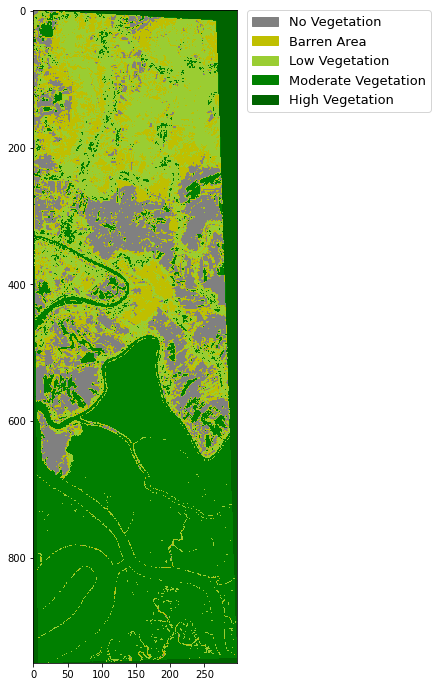

In [ ]:
# T5.1: Plot Classified NDVI With categorical Legend.
# Define color map
import matplotlib.colors as pc
ndvi_colours = ["gray", "y", "yellowgreen", "g", "darkgreen"]
ndvi_cmap = pc.ListedColormap(ndvi_colours)

# Define class names
ndvi_categories = ["No Vegetation", "Barren Area", "Low Vegetation", "Moderate Vegetation",
                  "High Vegetation"]

# Plot your data
plt.subplots(figsize=(12, 12))
im = plt.imshow(ndvi_indices, cmap = ndvi_cmap, )

epp.draw_legend(im, titles = ndvi_categories)

Hence, by adding categorical legends, it is very convenient to emphasise the land areas having varying vegetation.

Next, let us also compute other relevant vegetation indices from the spectral bands.

---

#### Activity 6: Calculating RENDVI and EVI

**Red-Edge Normalized Difference Vegetation Index (RENDVI):**

- RENDVI is used to measure the chlorophyll content in plants.
- It is also known as normalized difference red edge index (NDRE).
-  It is measured in a way similar to NDVI but uses the ratio of NIR and RE bands:

$$\text{RENDVI} = \frac{\text{(NIR - RE)}}{\text{(NIR + RE)}}$$

**NOTE:** The red edge (RE) is the part of the spectrum centered around 715 nm. For Sentinel-2 raster data, the band 5 has a center frequency of 705nm which is close to the desired range.

Let us now calculate RENDVI for our stacked raster data. It can be done using the `normalized_diff()` function of `earthpy.spatial` module, similar to that of NDVI.

For our Sentinel-2 raster data,
  - $\text{NIR}$ is at band 8.
  - $\text{RE}$ is at band 5.

Follow the steps given below to calculate and plot RENDVI for our raster data:
1. Call the `normalized_diff()` function of `earthpy.spatial` module and pass `arr_st[7]` and `arr_st[4]` as inputs. Here, `arr_st[7]` is band 8 and `arr_st[4]` is band 5.

2. Plot the calculated RENDVI using `plot_bands()` function. Pass the following parameters as input this function:
  - Computed RENDVI.
  - `cmap = "RdYlGn"`: To set colours for the colormap.
  - `vmin = -1` and `vmax = 1`: To set the range of values to be used for the colormap.



/usr/local/lib/python3.7/dist-packages/earthpy/spatial.py:105: RuntimeWarning: invalid value encountered in true_divide
  n_diff = (b1 - b2) / (b1 + b2)


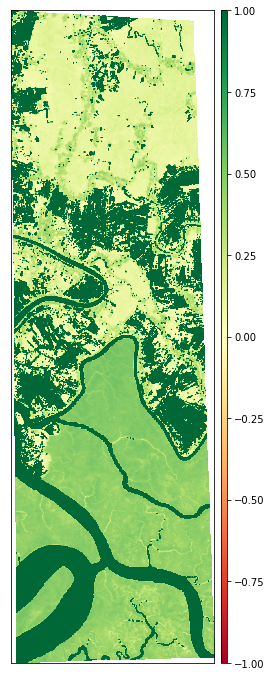

In [ ]:
# S6.1: Calculate RENDVI using arr_st[7] and arr_st[4] bands.
rendvi = es.normalized_diff(arr_st[7], arr_st[4])
epp.plot_bands(rendvi, cmap = "RdYlGn", vmin = -1, vmax = 1)
plt.show()

Here, we observe that the chlorophyll distribution is a bit different when compared with NDVI as it is highly dependent on:

1. The season and climatic conditions

2. Plant maturity

3. Type of the plant.

A general practice is to analyse the RENDVI at scientifically identified seasons to extract meaningful information on the crop health.

<br/>

**Enhanced Vegetation Index (EVI):**

Enhanced vegetation index is an optimised extension of NDVI and uses the information from the blue wavelength band to improve the accuracy of NDVI. It is particularly useful for:

1. Areas with dense canopy.

2. Correcting the atmospheric influences.

It is calculated as:

$$\text{EVI} = \frac{2.5 \times (\text{(NIR} - \text{Red})}{\text{[NIR} + (6 \times{\text{Red}}) - (7.5 \times \text{Blue}) + 1.0]}$$



For our Sentinel-2 raster data (refer `Table 1`),
  - $\text{NIR}$ is at band 8.
  - $\text{Red}$ is at band 4.
  - $\text{Blue}$ is at band 2.



Let's manually calculate the value of EVI and plot it using `plot_bands()` function. Also use the following attributes of `plot_bands()` function to customise the EVI image:
- `cmap ="RdYlGn"`: To set colours for the colormap.
- `vmin = -1` and `vmax = 1`: To set the range of values to use for the colormap.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


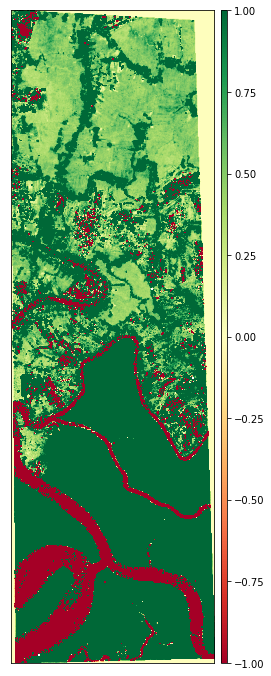

In [ ]:
# S6.2: Calculate EVI
evi = 2.5 * (arr_st[7] - arr_st[3]) / (arr_st[7] + (6.0 * arr_st[3]) - (7.5 * arr_st[1]) + 1.0)
epp.plot_bands(evi, cmap="RdYlGn", cols=1, vmin=-1, vmax=1)
plt.show()

Here we observe, that water bodies are clearly marked in red color.

**Advantages of EVI:**

- It enables us to clearly identify smaller water bodies. This is evident from the above plot.

- Due to improved sensitivity the variation in density in lighter vegetation areas can be identified easily.

<br>

Let us compare the RGB composite image plot with the plots obtained for vegetation indices.

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/5d9e3126-e424-4b49-96c5-74a50d0fe605.png" height =400></center>

We can observe that:

- EVI plot is more efficient in emphasising areas with light vegetation density.

- NDVI can pick minor variations within dense vegetation areas.

Hence it is generally advisable to plot multiple indices in order to understand the vegetation density.

**NOTE**: The RENDVI provides information on the chlorophyll, hence the variation in RENDVI plots through course of time provides more information about plant health and can be used to study seasonal response of the plants.



We will stop here. In the next class, we will compute water indices and mineral indices and apply few machine learning algorithms to perform land cover classification.

---

#### Activities


**Teacher Activities:**

1.   Satellite Imagery Analysis II - Sundarbans (Class Copy)

    Link on Panel


2.  Satellite Imagery Analysis II - Sundarbans (Reference)

    Link on Panel



---